In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<h2>Penjelasan Atribut</h2>

<table>
  <tr>
    <th>Num</th>
    <th>Attribute Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>1</td>
    <td>title</td>
    <td>Title</td>
  </tr>
  <tr>
    <td>2</td>
    <td>artist</td>
    <td>Artist</td>
  </tr>
  <tr>
    <td>3</td>
    <td>genre</td>
    <td>Genre of the song</td>
  </tr>
  <tr>
    <td>4</td>
    <td>year</td>
    <td>Year of the song (due to re-releases, the year might not correspond to the release year of the original song)</td>
  </tr>
  <tr>
    <td>5</td>
    <td>bpm</td>
    <td>Beats per minute</td>
  </tr>
  <tr>
    <td>6</td>
    <td>nrgy</td>
    <td>Energy of a song, the higher the value the more energetic the song is</td>
  </tr>
  <tr>
    <td>7</td>
    <td>dnce</td>
    <td>The higher the value, the easier it is to dance to this song.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>dB</td>
    <td>The higher the value, the louder the song</td>
  </tr>
  <tr>
    <td>9</td>
    <td>live</td>
    <td>The higher the value, the more likely the song is a live recording.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>val</td>
    <td>The higher the value, the more positive the mood for the song.</td></tr>
  <tr>
    <td>11</td>
    <td>dur</td>
    <td>The duration of the song</td>
  </tr>
  <tr>
    <td>12</td>
    <td>acous</td>
    <td>The higher the value the more acoustic the song is.</td>
  </tr>
  <tr>
    <td>13</td>
    <td>spch</td>
    <td>The higher the value the more spoken words the song contains.</td>
  </tr>
  <tr>
    <td>14</td>
    <td>popularity</td>
    <td>The higher the value the more popular the song is.</td>
  </tr>
  <tr>
    <td>15</td>
    <td>has_win_award</td>
    <td>Boolean value to indicate if the song has won an award or not. Value of 1 if the song has already won one or more awards otherwise 0 if the song hasn’t won any awards.</td>
  </tr>
</table>

load semua csv

In [2]:
df_1950 = pd.read_csv("1950.csv")
df_1960 = pd.read_csv("1960.csv")
df_1970 = pd.read_csv("1970.csv")
df_1980 = pd.read_csv("1980.csv")
df_1990 = pd.read_csv("1990.csv")
df_2000 = pd.read_csv("2000.csv")
df_2010 = pd.read_csv("2010.csv")
df_top10 = pd.read_csv("top10s.csv")
df_top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          602 non-null    object 
 1   artist         602 non-null    object 
 2   genre          602 non-null    object 
 3   year           602 non-null    int64  
 4   bpm            602 non-null    int64  
 5   nrgy           602 non-null    int64  
 6   dnce           602 non-null    int64  
 7   dB             602 non-null    int64  
 8   live           602 non-null    int64  
 9   val            602 non-null    int64  
 10  dur            602 non-null    int64  
 11  acous          602 non-null    int64  
 12  spch           602 non-null    int64  
 13  popularity     602 non-null    int64  
 14  has_win_award  602 non-null    float64
dtypes: float64(1), int64(11), object(3)
memory usage: 70.7+ KB


Preprocessing

In [3]:
# ubah data has_win_award dari float ke boolean
df_1950 = df_1950.astype({"has_win_award":bool})
df_1960 = df_1960.astype({"has_win_award":bool})
df_1970 = df_1970.astype({"has_win_award":bool})
df_1980 = df_1980.astype({"has_win_award":bool})
df_1990 = df_1990.astype({"has_win_award":bool})
df_2000 = df_2000.astype({"has_win_award":bool})
df_2010 = df_2010.astype({"has_win_award":bool})
df_top10 = df_top10.astype({"has_win_award":bool})

In [4]:
genre_total = pd.unique(df_1950.loc[:,'genre'])
genre_total = pd.unique(np.append(genre_total, pd.unique(df_1960.loc[:,'genre'])))
genre_total = pd.unique(np.append(genre_total, pd.unique(df_1970.loc[:,'genre'])))
genre_total = pd.unique(np.append(genre_total, pd.unique(df_1980.loc[:,'genre'])))
genre_total = pd.unique(np.append(genre_total, pd.unique(df_1990.loc[:,'genre'])))
genre_total = pd.unique(np.append(genre_total, pd.unique(df_2000.loc[:,'genre'])))
genre_total = pd.unique(np.append(genre_total, pd.unique(df_2010.loc[:,'genre'])))

In [5]:
df_1950.items()

<generator object DataFrame.items at 0x7f1956a9f510>

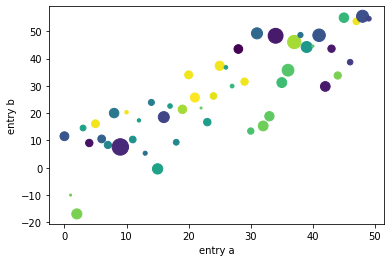

In [6]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

Clustering

In [7]:
# make scaler first
attribute_spotify_tmp = ["bpm","nrgy","dnce","dB","live","val","dur","acous","spch","popularity","has_win_award"]
attribute_spotify = ["bpm","nrgy","dnce","dB","live","val","acous","spch","popularity"]

sc = StandardScaler()
df_top10_std = sc.fit_transform(df_top10.loc[:,attribute_spotify])
df_top10_std = pd.DataFrame(df_top10_std, columns=attribute_spotify)


In [10]:
# menggunakan clustering kmeans
# mencari nilai optimal dari k
sum_of_squared_distance = []
k = range(1,25)
for i in k:
    cluster_data = KMeans(n_clusters=i)
    cluster_data = cluster_data.fit(df_top10_std)
    sum_of_squared_distance.append(cluster_data.inertia_)

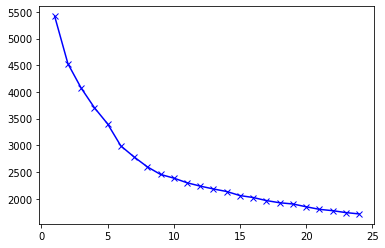

In [11]:
plt.plot(k,sum_of_squared_distance, "bx-")
plt.xlabel="K"
plt.ylabel="sum of squared distance"
plt.title="optimal of k"
plt.show()